Epoch 000 | Misclassification Rate: 0.0400
Epoch 001 | Misclassification Rate: 0.0200
Epoch 002 | Misclassification Rate: 0.0000
Epoch 003 | Misclassification Rate: 0.0000
Epoch 004 | Misclassification Rate: 0.0000
Epoch 005 | Misclassification Rate: 0.0000
Epoch 006 | Misclassification Rate: 0.0000
Epoch 007 | Misclassification Rate: 0.0000
Epoch 008 | Misclassification Rate: 0.0000
Epoch 009 | Misclassification Rate: 0.0000
Epoch 010 | Misclassification Rate: 0.0000
Epoch 011 | Misclassification Rate: 0.0000
Epoch 012 | Misclassification Rate: 0.0000
Epoch 013 | Misclassification Rate: 0.0000
Epoch 014 | Misclassification Rate: 0.0000
Epoch 015 | Misclassification Rate: 0.0000
Epoch 016 | Misclassification Rate: 0.0000
Epoch 017 | Misclassification Rate: 0.0000
Epoch 018 | Misclassification Rate: 0.0000
Epoch 019 | Misclassification Rate: 0.0000
Epoch 020 | Misclassification Rate: 0.0000
Epoch 021 | Misclassification Rate: 0.0000
Epoch 022 | Misclassification Rate: 0.0000
Epoch 023 |

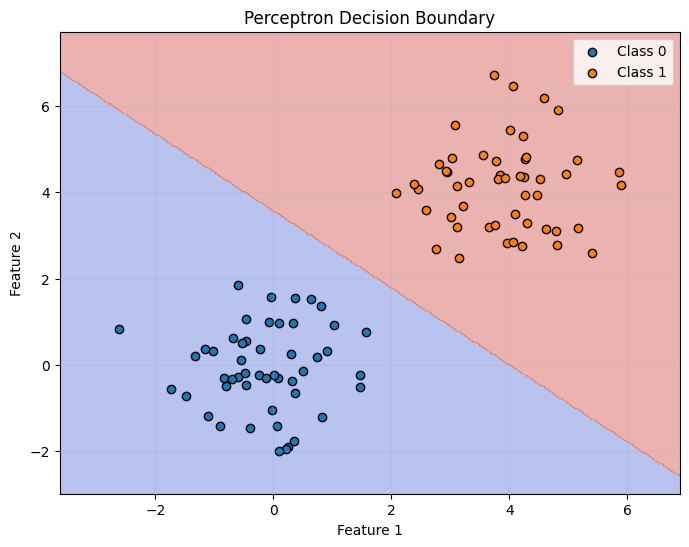

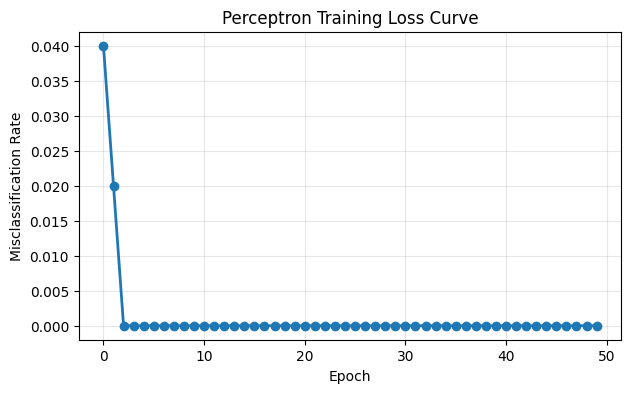

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# generate linearly separable data

np.random.seed(42)

X1 = np.random.randn(50, 2) + [0, 0]
X2 = np.random.randn(50, 2) + [4, 4]

X = np.vstack((X1, X2))
y = np.array([0]*50 + [1]*50)

# percepton from scratch
class Perceptron:
    def __init__(self, lr=0.01, epochs=50):
        self.lr = lr
        self.epochs = epochs

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0
        self.losses = []

        for epoch in range(self.epochs):
            errors = 0

            for i in range(n_samples):
                y_pred = self.predict_one(X[i])
                update = self.lr * (y[i] - y_pred)

                if update != 0:
                    self.w += update * X[i]
                    self.b += update
                    errors += 1
                
            loss = errors / n_samples
            self.losses.append(loss)

            # epoch-wise print
            print(f"Epoch {epoch:03d} | Misclassification Rate: {loss:.4f}")

    def predict_one(self, x):
        return 1 if np.dot(x, self.w) + self.b >= 0 else 0
    
    def predict(self, X):
        return np.array([self.predict_one(x) for x in X])
    
# Train Perceptron
model = Perceptron(lr=0.01, epochs=50)
model.fit(X, y)

# visualization 1. Decision Boundary
def plot_decision_boundary(X, y, model):
    plt.figure(figsize=(8,6))

    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )

    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4, cmap="coolwarm")
    plt.scatter(X[y==0][:,0], X[y==0][:,1], label="Class 0", edgecolor="k")
    plt.scatter(X[y==1][:,0], X[y==1][:,1], label="Class 1", edgecolor="k")

    plt.title("Perceptron Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

plot_decision_boundary(X, y, model)

# visualization 2: Loss Curve
plt.figure(figsize=(7,4))
plt.plot(model.losses, marker="o", linewidth=2)
plt.xlabel("Epoch")
plt.ylabel("Misclassification Rate")
plt.title("Perceptron Training Loss Curve")
plt.grid(alpha=0.3)
plt.show()